In [1]:
from typing import Tuple
from pprint import pprint
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# OFFICIAL CV2 IMPLEMENTATION
kernel_size = 7
sigma = 2 
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)

gaussian_kernel

array([[0.07015933],
       [0.13107488],
       [0.19071282],
       [0.21610594],
       [0.19071282],
       [0.13107488],
       [0.07015933]])

In [4]:
gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel.transpose())

gaussian_kernel_2d

array([[0.00492233, 0.00919613, 0.01338028, 0.01516185, 0.01338028,
        0.00919613, 0.00492233],
       [0.00919613, 0.01718062, 0.02499766, 0.02832606, 0.02499766,
        0.01718062, 0.00919613],
       [0.01338028, 0.02499766, 0.03637138, 0.04121417, 0.03637138,
        0.02499766, 0.01338028],
       [0.01516185, 0.02832606, 0.04121417, 0.04670178, 0.04121417,
        0.02832606, 0.01516185],
       [0.01338028, 0.02499766, 0.03637138, 0.04121417, 0.03637138,
        0.02499766, 0.01338028],
       [0.00919613, 0.01718062, 0.02499766, 0.02832606, 0.02499766,
        0.01718062, 0.00919613],
       [0.00492233, 0.00919613, 0.01338028, 0.01516185, 0.01338028,
        0.00919613, 0.00492233]])

In [5]:
def plot_kernel(kernel):
    plt.figure()
    plt.plot(kernel)
    plt.title('Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

In [7]:
def plot_3d_kernel(kernel):
    # Create the x and y coordinate arrays
    x = np.arange(kernel.shape[0])
    y = np.arange(kernel.shape[1])
    x, y = np.meshgrid(x, y)

    # Create the figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(x, y, kernel, cmap='viridis')

    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Kernel Value')
    ax.set_title('3D Representation of 2D Kernel')

    # Show the plot
    plt.show()

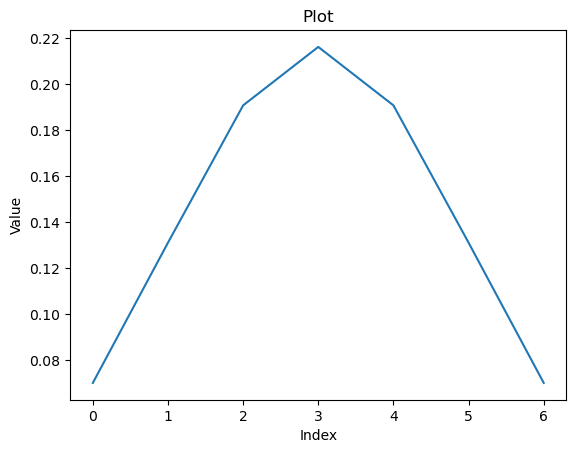

In [8]:
plot_kernel(gaussian_kernel)

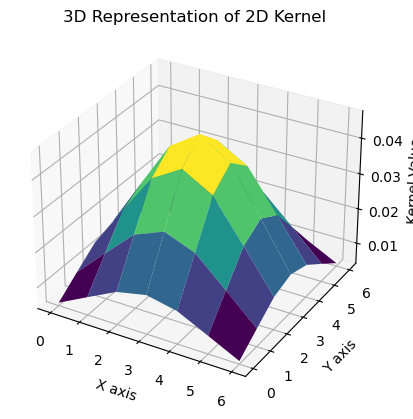

In [9]:
plot_3d_kernel(gaussian_kernel_2d)

In [15]:
def plot_kernels(kernel_1D, kernel_2D):
    # Create the figure
    fig = plt.figure()
    
    ax = fig.add_subplot(121)

    ax.plot(kernel_1D)
    ax.set_title('Plot')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    
    
    ax = fig.add_subplot(122, projection='3d')
    
    # Create the x and y coordinate arrays
    x = np.arange(kernel_2D.shape[0])
    y = np.arange(kernel_2D.shape[1])
    x, y = np.meshgrid(x, y)

    # Plot the surface
    ax.plot_surface(x, y, kernel_2D, cmap='viridis')

    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Kernel Value')
    ax.set_title('3D Representation of 2D Kernel')
    

In [2]:
def get_gaussian_filter_medium(sigma: int | float,
                        kernel_shape: Tuple[int, int] = (3, 3)) -> np.ndarray:
    """Returns a Gaussian filter, given a sigma and a kernel size

    Args:
        sigma (int | float): standard deviation (square root of variance)
        kernel_size (int, optional): kernel size. Defaults to 3.

    Returns:
        np.ndarray: Gaussian filter
    """
    m, n= kernel_shape
    assert m % 2 == 1 and n % 2 == 1, "Kernel size must be odd"
    
    m_half, n_half = m // 2, n // 2
    
    kernel = np.zeros(kernel_shape, dtype=np.float32)

    for y in range(-m_half, m_half + 1):
        for x in range(-n_half, n_half + 1):
            # normal = 1 / (np.sqrt(2.0 * np.pi) * sigma)
            # exp_term = np.exp(- (np.abs(x-y)**2) / (2.0 * (sigma ** 2)))
            
            normal = 1 / (2 * np.pi * (sigma**2))
            exp_term = np.exp(-(x**2.0 + y**2.0) / (2.0 * sigma**2.0))
            
            print(f"y + m_half: {y + m_half}, x + n_half: {x + n_half} value: {normal * exp_term}")
            kernel[y + m_half, x + n_half] = normal * exp_term
            
    return kernel

In [3]:
def get_gaussian_filter_keagle(sigma, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size))

    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - (kernel_size - 1) / 2
            y = j - (kernel_size - 1) / 2
            kernel[i, j] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-1 * ((x ** 2 + y ** 2) / (2 * sigma ** 2)))

    return kernel

In [18]:
np.sum(gaussian_kernel_2d), np.sum(gaussian_kernel)

(0.9999999999999999, 0.9999999999999999)

In [5]:
def plot_3d_gaussian_kernel(kernel, wireframe=False):
    """
    Plots a 3D representation of a Gaussian kernel with an option for a wireframe plot.

    Parameters:
    kernel (numpy.ndarray): 2D Gaussian kernel.
    wireframe (bool): If True, plot a wireframe instead of a surface. Default is False.

    The function creates a 3D plot where the x and y axes represent the position in the kernel
    and the z axis represents the value of the kernel at that position.
    """
    # Get the dimensions of the kernel
    kernel_size = kernel.shape[0]
    
    # Create a grid for plotting
    x = np.linspace(0, kernel_size-1, 100)
    y = np.linspace(0, kernel_size-1, 100)
    x, y = np.meshgrid(x, y)

    # Interpolate kernel values for smoothness
    from scipy.interpolate import interp2d
    interp_func = interp2d(range(kernel_size), range(kernel_size), kernel, kind='cubic')
    z = interp_func(np.linspace(0, kernel_size-1, 100), np.linspace(0, kernel_size-1, 100))

    # Create a 3D figure
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface or wireframe
    if wireframe:
        ax.plot_wireframe(x, y, z, color='black')
    else:
        ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

    # Set labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Gaussian value')
    ax.set_title('3D Plot of Gaussian Kernel')

    # Show the plot
    plt.show()

In [6]:
def plot_vector(vector: np.ndarray):
    plt.figure()
    plt.plot(vector)
    plt.title('Vector Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

In [8]:
gaussian_kernel = get_gaussian_filter_medium(2, (7, 7))

pprint(gaussian_kernel)
gaussian_kernel.shape, np.sum(gaussian_kernel)

y + m_half: 0, x + n_half: 0 value: 0.004193701896768354
y + m_half: 0, x + n_half: 1 value: 0.00783486661531332
y + m_half: 0, x + n_half: 2 value: 0.011399663659959647
y + m_half: 0, x + n_half: 3 value: 0.01291751124176539
y + m_half: 0, x + n_half: 4 value: 0.011399663659959647
y + m_half: 0, x + n_half: 5 value: 0.00783486661531332
y + m_half: 0, x + n_half: 6 value: 0.004193701896768354
y + m_half: 1, x + n_half: 0 value: 0.00783486661531332
y + m_half: 1, x + n_half: 1 value: 0.014637457881079792
y + m_half: 1, x + n_half: 2 value: 0.021297375548806625
y + m_half: 1, x + n_half: 3 value: 0.02413308815751348
y + m_half: 1, x + n_half: 4 value: 0.021297375548806625
y + m_half: 1, x + n_half: 5 value: 0.014637457881079792
y + m_half: 1, x + n_half: 6 value: 0.00783486661531332
y + m_half: 2, x + n_half: 0 value: 0.011399663659959647
y + m_half: 2, x + n_half: 1 value: 0.021297375548806625
y + m_half: 2, x + n_half: 2 value: 0.030987498577413244
y + m_half: 2, x + n_half: 3 value: 0

((7, 7), 0.8519747)

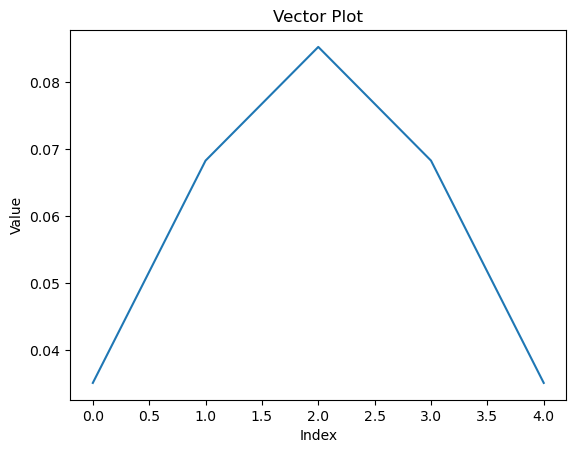

In [11]:
gaussian_kernel_SLICE =  gaussian_kernel_2d[:, gaussian_kernel_2d.shape[0]//2]
plot_vector(gaussian_kernel_SLICE)

/tmp/ipykernel_46214/2969216243.py:22: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_func = interp2d(range(kernel_size), range(kernel_size), kernel, kind='cubic')
/tmp/ipykernel_46214/2969216243.py:23: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D d

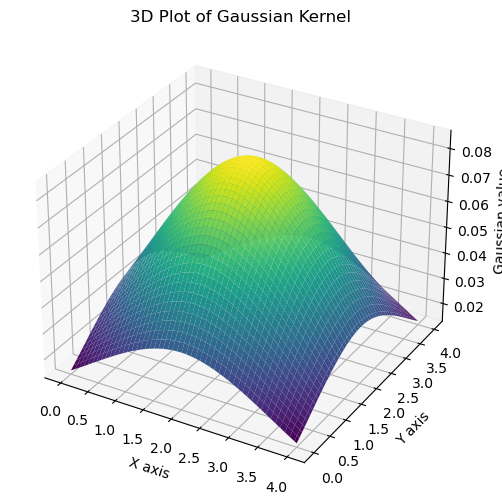

In [12]:
plot_3d_gaussian_kernel(gaussian_kernel_2d)